In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import set_config
set_config(print_changed_only=False)
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
df = pd.read_csv("./Data/Stars.csv")
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


### 📖Check whether data is balanced

In [7]:
sizes = df['Type'].value_counts(sort=1)
sizes

0    40
1    40
2    40
3    40
4    40
5    40
Name: Type, dtype: int64

In [8]:
df.drop(["Color", "Spectral_Class"], axis=1, inplace=True)
df

,Temperature,L,R,A_M,Type
0,3068,0.002400,0.1700,16.12,0
1,3042,0.000500,0.1542,16.60,0
2,2600,0.000300,0.1020,18.70,0
3,2800,0.000200,0.1600,16.65,0
4,1939,0.000138,0.1030,20.06,0
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5
236,30839,834042.000000,1194.0000,-10.63,5
237,8829,537493.000000,1423.0000,-10.73,5
238,9235,404940.000000,1112.0000,-11.23,5


### 📖Divide data into "features" and "classes"

In [9]:
x = df.iloc[:, 0:4]
y = df.iloc[:, 4]
x.head()

,Temperature,L,R,A_M
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06


### 📖Seperate into train and test data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.33, random_state=42, shuffle=True)

print(f"x_train:  {x_train.shape}")
print(f"y_train:  {y_train.shape}")
print(f"x_test:  {x_test.shape}")
print(f"y_test:  {y_test.shape}")

x_train:  (160, 4)
y_train:  (160,)
x_test:  (80, 4)
y_test:  (80,)


### 📖Build a custom Random Forest model

In [14]:
model = RandomForestClassifier(n_estimators=100, criterion="gini", max_features=3)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### 📖Check performance

In [15]:
print(f"\Accuracy of train data: {model.score(x_train, y_train)}")
print(f"Accuracy of test data: {model.score(x_test, y_test)}")

\Accuracy of train data: 1.0
Accuracy of test data: 1.0


Text(24.0, 0.5, 'Truth')

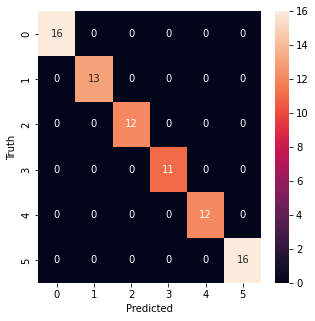

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

y_pred_test = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [20]:
feature_list = list(x.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
feature_imp

A_M            0.447257
R              0.410906
L              0.076058
Temperature    0.065779
dtype: float64